# Exercici 1

Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [1]:
# Importem les llibreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Eliminem limitacions en l'amplada de les columnes
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

# Carreguem el dataset i el visualitzem
df_uefa = pd.read_csv('Lligues europees UEFA.csv', sep=';', encoding='latin2') # Especifiquem separadors i encoding
df_uefa.head() # Mostrem els primers resultats

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas


In [2]:
# Mirarem també quantes files té el nostre dataset (necessitarem aquesta informació més endavant per fer càlculs)
df_uefa.shape

(98, 21)

Com podem veure, el nostre dataset té 98 files i 21 columnes.

In [3]:
# Observem el tipus de variables del dataset per entendre de què es tracten
df_uefa.dtypes

Rk                   int64
Squad               object
Country             object
LgRk                 int64
MP                   int64
W                    int64
D                    int64
L                    int64
GF                   int64
GA                   int64
GD                   int64
Pts                  int64
Pts/G              float64
xG                 float64
xGA                float64
xGD                float64
xGD/90             float64
Last 5              object
Attendance           int64
Top Team Scorer     object
Goalkeeper          object
dtype: object

Primerament descriurem les variables per poder seleccionar un atribut que ens interessi.

1. Rk (Classificació): Variable discreta que representa la classificació de l'equip o el conjunt en una lliga o competició.

2. Squad (Equip): Variable categòrica nominal que representa el nom de l'equip de futbol.

3. Country (País): Variable categòrica nominal que representa el país de l'equip.

4. LgRk (Classificació de Lliga): Variable numèrica discreta que representa la classificació de l'equip dins de la lliga.

5. MP (Partits Jugats): Variable numèrica discreta que representa el nombre de partits jugats per l'equip.

6. W (Victòries): Variable numèrica discreta que representa el nombre de partits guanyats per l'equip.

7. D (Empats): Variable numèrica discreta que representa el nombre de partits que han acabat en empat per l'equip.

8. L (Derrotes): Variable numèrica discreta que representa el nombre de partits perduts per l'equip.

9. GF (Gols a Favor): Variable numèrica discreta que representa el nombre total de gols marcats per l'equip.

10. GA (Gols en Contra): Variable numèrica discreta que representa el nombre total de gols encaixats per l'equip.

11. GD (Diferència de Gols): Variable numèrica discreta que representa la diferència entre els gols marcats (GF) i els gols encaixats (GA).

12. Pts (Punts): Variable numèrica discreta que representa el nombre total de punts guanyats per l'equip a la lliga o competició.

13. Pts/G (Punts Per Partit): Variable numèrica contínua que representa el nombre mitjà de punts guanyats per partit.

14. xG (Gols Esperats): Variable numèrica contínua que representa el nombre de gols esperats que un equip hauria de marcar basant-se en diversos factors.

15. xGA (Gols Esperats en Contra): Variable numèrica contínua que representa el nombre de gols esperats que un equip hauria d'encaixar basant-se en diversos factors.

16. xGD (Diferència de Gols Esperada): Variable numèrica contínua que representa la diferència entre els gols esperats marcats (xG) i els gols esperats encaixats (xGA).

17. xGD/90 (Diferència de Gols Esperada per 90 Minuts): Variable numèrica contínua que representa la diferència de gols esperada per cada 90 minuts de joc.

18. Last 5 (Últims 5): Variable categòrica ordinal que ens dóna informació sobre el rendiment de l'equip en els darrers 5 partits (si ha guanyat o ha perdut). 

19. Attendance (Assistència): Variable numèrica discreta que representa el nombre d'espectadors o seguidors que han assistit als partits de l'equip.

20. Top Team Scorer (Golejador Principal): Variable categòrica nominal que representa el nom del màxim golejador de l'equip.

21. Goalkeeper (Porter): Variable categòrica nominal que representa el nom del porter de l'equip.

Com hem pogut veure, el dataset conté informació sobre la UEFA, incloent dades sobre el rendiment de l'equip, estadístiques i altres detalls com l'assistència del públic. Ens pot servir doncs, per analitzar el rendiment dels diferents equips. 

En aquest cas, hem decidit analitzar si l'assistència de públic influeix en el rendiment de l'equip. Per tant, seleccionarem la variable independent 'Attendance' (Assistència) i la variable dependent 'Pts' (Punts). Amb l'objectiu d'obtenir aquesta informació concreta, definim el test d'hipòtesi següent:
- Ho (Hipòtesi nul.la): No hi ha relació entre les variables seleccionades. És a dir, el nivell d'assistència de públic no influeix en el rendiment de l'equip.
- Ha (Hipòtesi alternativa): Hi ha una relació entre les variables seleccionades. És a dir, el nivell d'assistència influeix en el rendiment de l'equip.

A continuació farem un anàlisi estadístic de les variables:

In [4]:
df_uefa.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,28.434134,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,49.500000,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,73.750000,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


L'anàlisi estadística del dataframe, amb 98 registres, mostra les següents característiques: la posició mitjana a la lliga és de 10.32, amb una mitjana de 36.31 partits jugats per equip. Els equips tenen una mitjana de 13.45 victòries, 9.41 empats, i 13.45 derrotes. El nombre mitjà de gols a favor per equip és de 50.88, amb un nombre igual de gols en contra, resultant en una diferència de gols mitjana de zero. Els equips acumulen una mitjana de 49.73 punts, amb una mitjana de 1.37 punts per partit. Els gols esperats (xG) i els gols esperats en contra (xGA) són, respectivament, 48.65 i 48.65, amb una lleugera diferència negativa de gols esperats (-0.005). La mitjana d'assistència als partits és de 24.240 espectadors. Aquestes dades reflecteixen una certa uniformitat en el rendiment dels equips, amb variacions en l'assistència i els gols esperats que indiquen diferències notables en l'estil de joc i la popularitat dels equips.




Ara evaluarem les correlacions de les variables, mitjançant un heatmap:

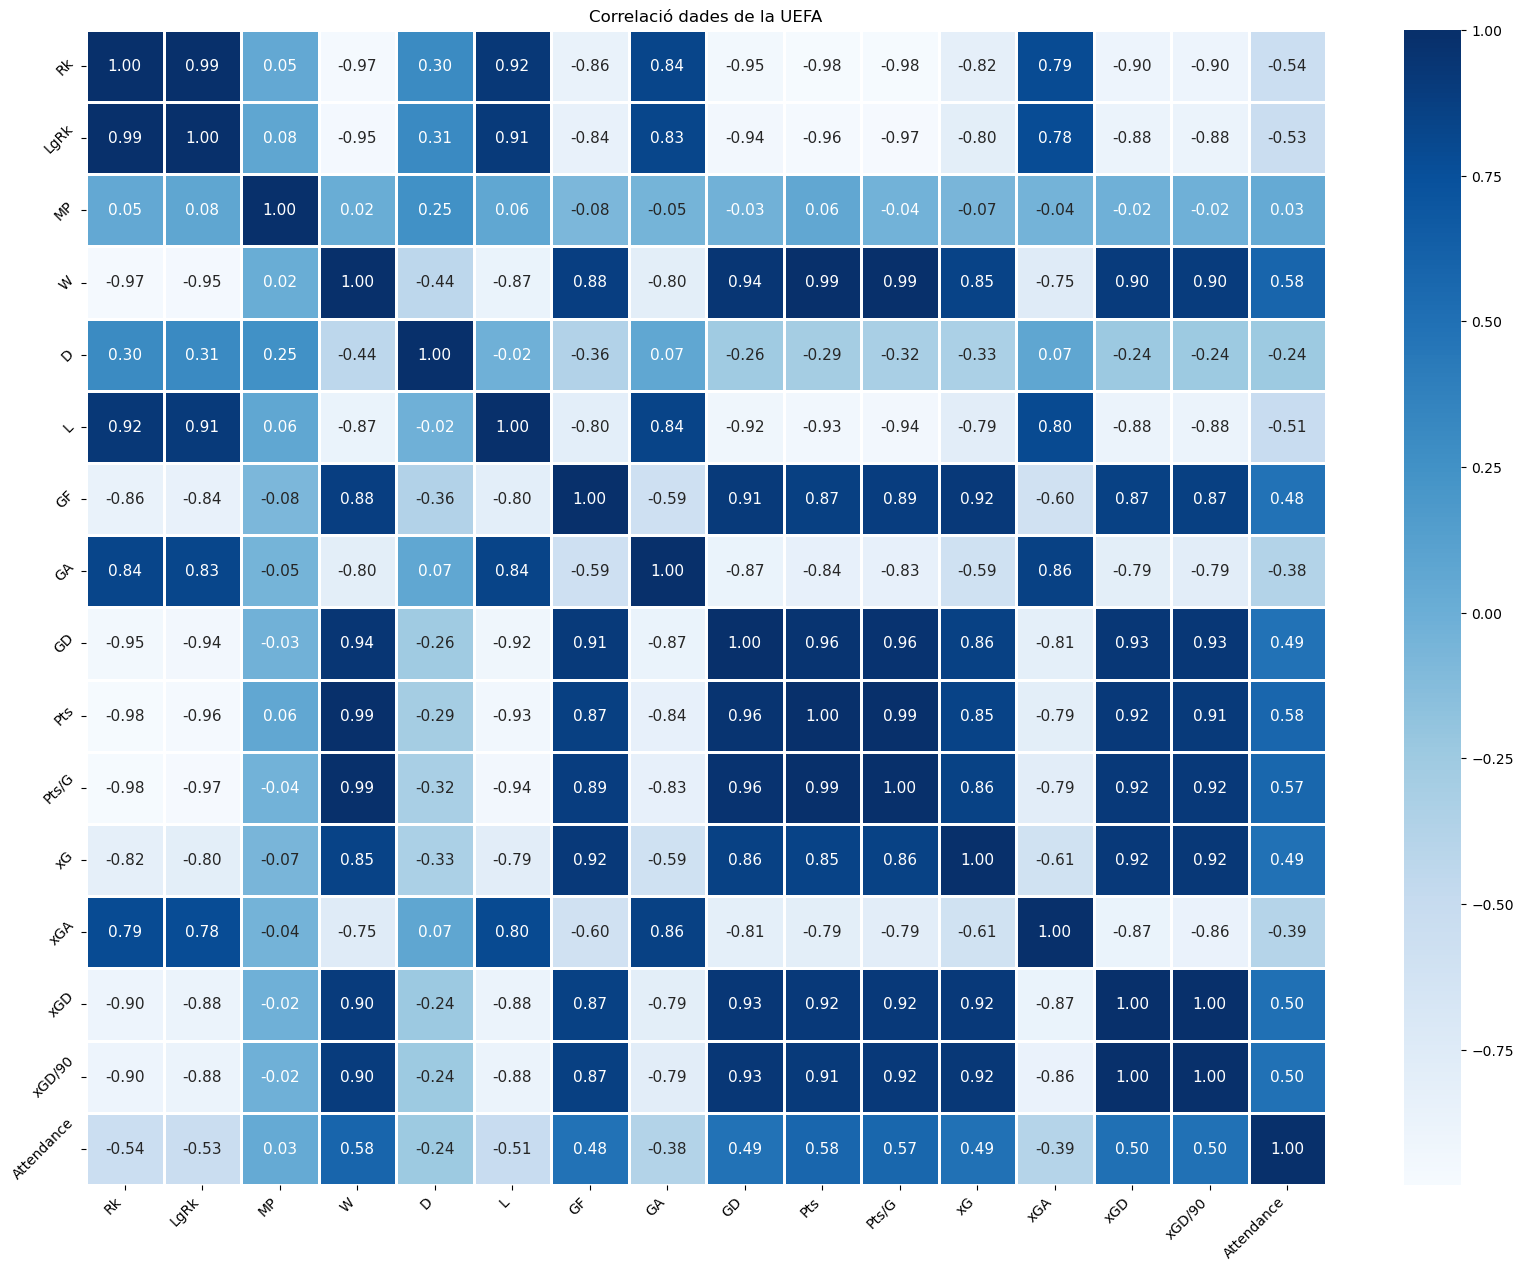

In [5]:
# Seleccionem només les columnes numèriques
df_uefa_num = df_uefa.select_dtypes(include=[np.number])

plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(df_uefa_num.corr(), annot=True, cmap='Blues', center=0, fmt=".2f", 
                      annot_kws={'size': 11}, linecolor='white', linewidths=1) # Afegim una vora divisòria en la quadrícula amb linewidths
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotar i ajustar la mida de la lletra dels eixos
plt.yticks(rotation=45, fontsize=10)
plt.title('Correlació dades de la UEFA')

# Guardem  el gràfic
plt.savefig('correlacio_uefa.png', bbox_inches='tight')

# Mostrem el gràfic
plt.show()

El heatmap revela diverses relacions esperades dins les dades de la UEFA. Una correlació negativa forta entre la Classificació (Rk) i els Punts (Pts) (-0.90) suggereix que els equips amb més punts tendeixen a estar millor classificats, el que és lògic ja que els punts són directament responsables de la classificació en la lliga. Les victòries (W) estan positivament correlacionades amb els punts (0.92) i negativament amb la Classificació de Lliga (LgRk) (-0.98), indicant que més victòries milloren la posició de l'equip en la classificació. Com es podria esperar, hi ha una forta correlació entre els Gols a Favor (GF) i la Diferència de Gols (GD) (0.99), ja que la diferència de gols és una conseqüència directa dels gols marcats i encaixats. Curiosament, la correlació entre els Partits Jugats (MP) i l'Assistència és baixa, suggerint que altres factors podrien influir en l'assistència dels aficionats més que simplement la quantitat de partits jugats. Aquestes correlacions ens donen una comprensió clara de com les victòries, la puntuació i els gols influeixen en la classificació d'un equip, tot i que cal recordar que la correlació no implica causalitat.

El que podem fer ara és traçar un diagrama de dispersió entre els Gols a Favor (GF) i la Diferència de Gols (GD) per veure com es distribueixen els punts al voltant de la línia de regressió. Això també pot ajudar a identificar equips que, tot i tenir molts gols a favor, no tenen una gran diferència de gols, el que podria indicar una defensa dèbil o altres anomalies estratègiques.

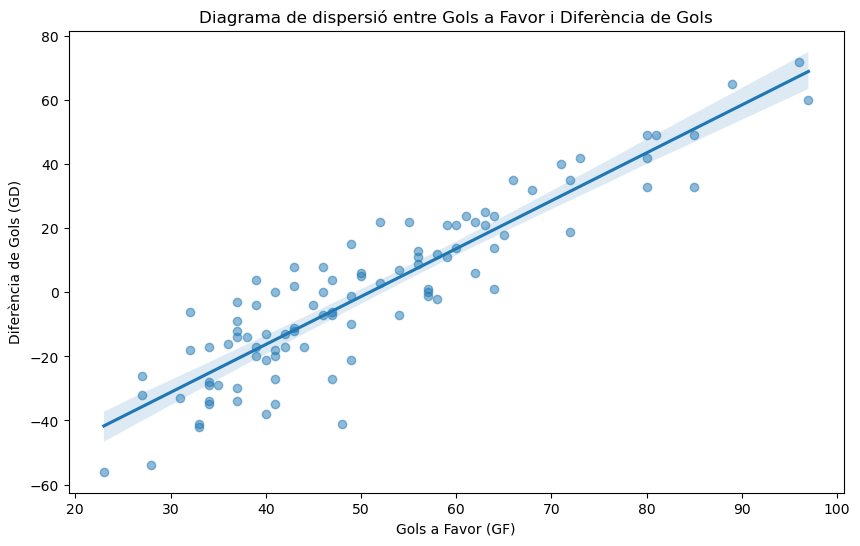

In [6]:
# Creem el diagrama de dispersió
plt.figure(figsize=(10, 6))
sns.regplot(x='GF', y='GD', data=df_uefa, scatter_kws={'alpha':0.5})

# Creem les etiquetes dels eixos i títol del gràfic
plt.title('Diagrama de dispersió entre Gols a Favor i Diferència de Gols')
plt.xlabel('Gols a Favor (GF)')
plt.ylabel('Diferència de Gols (GD)')

# Mostrem el gràfic
plt.show()

Com podem veure gràficament, hi ha una forta correlació entre les dues variables, Gols a Favor (GF) i Diferència de Gols (GD). Això suggereix que el model xG (gols esperats) és un indicador fiable del rendiment ofensiu d'un equip. Aquesta estreta correlació valida l'eficàcia del model xG en la predicció dels gols, i mostra una consistència en el rendiment dels equips respecte a les seves oportunitats de gol. Les desviacions significatives d'aquesta tendència poden assenyalar factors com l'eficàcia excepcional en la finalització, la sort, o possibles ineficiències, i aquesta informació pot ser molt valuosa per a anàlisis de rendiment més detallats, planificació estratègica i decisions de gestió de l'equip.

Cal dir també que observem una major concentració de punts entre els Gols a Favor (GF) amb valors de 30 a 65 i la Diferència de Gols (GD) en un rang de -40 a 25 aproximadament, fet que podria indicar:

- Nivell general de rendiment ofensiu: La concentració de GF entre 30 i 65 indica un rendiment ofensiu relativament estandarditzat dins de la lliga, mostrant que la majoria dels equips tenen un rendiment similar en termes de gols marcats.

- Varietat en la diferència de gols: Un rang de GD de -40 a 25 mostra una variabilitat substancial en la defensa i l'eficàcia ofensiva dels equips. Alguns equips podrien estar marcant molts gols però també encaixant bastants (GD propera a 0 o lleugerament negativa), mentre que altres podrien tenir un millor equilibri entre ofensiva i defensiva, resultant en una GD positiva.

- Competitivitat i equilibri: La distribució dins d'aquest rang podria indicar un equilibri competitiu en la lliga, amb equips lluitant de prop en partits i mantenint un nivell bàsic de rendiment ofensiu.

- Estratègia i millora: Per als equips amb una GD negativa (especialment aquells amb un alt GF), això podria suggerir que, encara que són forts en l'atac, poden necessitar enfocar-se en millorar la seva defensa per optimitzar els seus resultats de partits i millorar la classificació.

En resum, aquesta concentració de punts podria reflectir característiques comunes de rendiment entre els equips de la lliga, amb algunes oportunitats per a millora, especialment en termes de defensa per als equips amb una alta quantitat de gols marcats però amb una diferència de gols no tan alta.

També podem fer un anàlisi de la relació entre els Gols Esperats (xG) i els Gols a Favor (GF) utilitzant un diagrama de dispersió. Pot ser útil per validar la precisió del model xG, identificar si els equips estan rendint per sobre o per sota de les expectatives basades en les seves oportunitats de gol, i per analitzar l'eficiència ofensiva. Un nombre inusualment alt de GF en comparació amb xG pot indicar una sort o eficàcia excepcional, mentre que un nombre baix pot suggerir manca d'acabament o mala sort. Aquesta informació pot ajudar en la presa de decisions estratègiques, com les tàctiques de joc o les decisions de gestió d'equips.

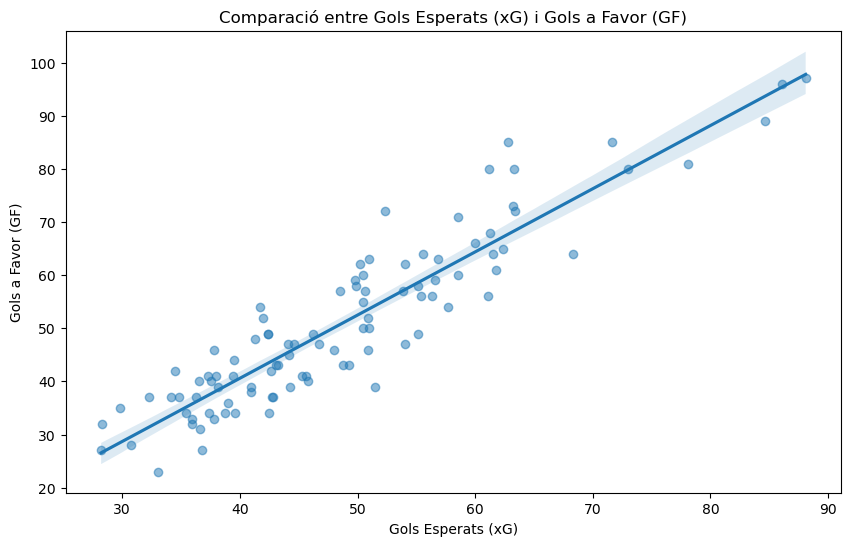

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creem el diagrama de dispersió amb una línia de regressió
plt.figure(figsize=(10, 6))
sns.regplot(x='xG', y='GF', data=df_uefa, scatter_kws={'alpha':0.5})

# Creem títol i etiquetes per als eixos
plt.title('Comparació entre Gols Esperats (xG) i Gols a Favor (GF)')
plt.xlabel('Gols Esperats (xG)')
plt.ylabel('Gols a Favor (GF)')

# Mostrem el gràfic
plt.show()

Com podem veure en el gràfic de Gols Esperats (xG) i Gols a Favor (GF) els punts també es distribueixen al llarg de la recta de regressió, amb alguns valors més allunyats en comparació amb el gràfic anterior.  La majoria de punts es concentren de 35 a 60 en l'eix  xG i de 30 a 65 en l'eix GF. Això ens porta a les següents conclusions:

- Correlació forta i positiva: La distribució dels punts al llarg de la línia de regressió indica una forta correlació positiva entre xG i GF. Això significa que, en general, a mesura que els Gols Esperats augmenten, els Gols a Favor reals també ho fan, suggerint que el model xG és efectiu per predir la quantitat de gols que un equip probablement marcarà.

- Consistència en el rendiment ofensiu: El fet que la majoria dels punts es concentri en un rang específic de xG i GF indica un nivell de consistència en el rendiment ofensiu dels equips dins d'aquesta gamma. La majoria dels equips semblen tenir un rendiment ofensiu dins d'aquests límits, mostrant un patró comú en la lliga.

- Alguns equips excepcionals: Els punts que es desvien més de la línia de regressió podrien representar equips que tenen un rendiment excepcionalment alt o baix en comparació amb el que els models esperaven. Per exemple, un equip amb un alt GF però un xG més baix podria estar demostrant una eficàcia excepcional en la finalització, o podria haver tingut una sort particular en alguns partits.

- Oportunitats per a un anàlisi detallat: Aquesta concentració i les desviacions podrien ser explorades més detalladament per entendre millor quins equips estan superant o no estan complint amb les expectatives, i per identificar possibles àrees de millora o estratègies que estan funcionant particularment bé.

Ara volem fer un anàlisi de regressió per provar la relació entre l'assistència i els punts guanyats per l'equip, que ens proporcionarà el coeficient per a l'assistència, juntament amb el seu p-valor. D'aquesta manera podrem avaluar la significació estadística de la relació entre aquestes variables.

En primer lloc establirem la nostra hipòtesi:

- Hipòtesi Nul·la (H0): No hi ha una relació estadísticament significativa entre l'assistència i els punts guanyats per l'equip.

- Hipòtesi Alternativa (H1): Hi ha una relació estadísticament significativa entre l'assistència i els punts guanyats per l'equip.

Ara comprovarem els requisits per dur a terme l'anàlisi de regressió lineal: linealitat, homocedasticitat, normalitat dels residus i independència. Els passos doncs que seguirem són els següents:

1. Comprovació de la Linealitat <br>
Un diagrama de dispersió (scatterplot) entre la variable independent (assistència) i la variable dependent (punts guanyats) pot ajudar a visualitzar si la relació entre aquestes dues variables és lineal. Si el patró dels punts en el gràfic s'ajusta a una línia recta (o aproximadament), això suggeriria una relació lineal.

2. Comprovació de la Homoscedasticitat <br>
Gràfic de Residus vs. Valors Ajustats: Per comprovar la homoscedasticitat (variància constant dels residus), podem fer un gràfic dels residus (la diferència entre els valors observats i els predits) contra els valors predits. Si els residus es distribueixen de manera uniforme a través de tots els valors predits, això indica homoscedasticitat.

3. Comprovació de la Normalitat dels Residus <br>
Gràfic Q-Q (Quantile-Quantile): Aquest gràfic compara la distribució dels residus amb una distribució normal. Si els punts en el gràfic Q-Q segueixen una línia recta, això indica que els residus tenen una distribució normal.
Tests de Normalitat: Podries podem utilitzar tests estadístics com el de Shapiro-Wilk o Kolmogorov-Smirnov per comprovar la normalitat.

4. Comprovació de la Independència <br>
Anàlisi dels Residus: La independència dels errors (residus) es pot comprovar mirant si hi ha patrons en els residus. Això es pot fer mitjançant gràfics de residus o tests estadístics específics.

En primer lloc farem la comprovació de la linealitat:

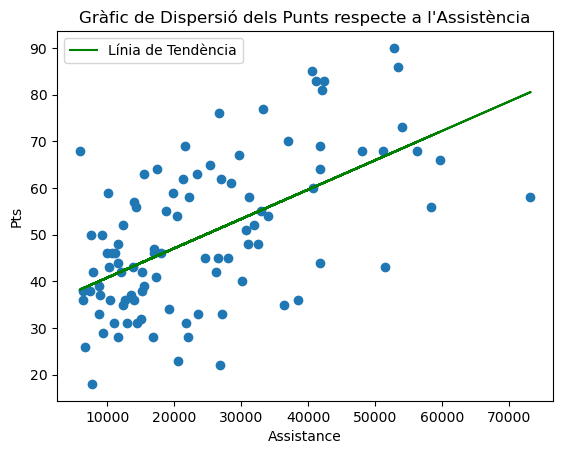

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 'x' és la variable independent ('Attendance') i 'y' la variable dependent ('Pts')
x = df_uefa['Attendance']
y = df_uefa['Pts']

# Calculem els coeficients de la línia de regressió
coeficients = np.polyfit(x, y, 1)  # El '1' indica regressió lineal (polinomi de grau 1)
tendencia = np.poly1d(coeficients)

# Creaem el gràfic de dispersió
plt.scatter(x, y)

# Afegim la línia de tendència al gràfic
plt.plot(x, tendencia(x), color='green', label='Línia de Tendència')

# Afegim títols i etiquetes
plt.title('Gràfic de Dispersió dels Punts respecte a l\'Assistència')
plt.xlabel('Assistance')
plt.ylabel('Pts')
plt.legend()

# Mostrem el gràfic
plt.show()


Com podem veure al gràfic, la relació entre les dues variables és lineal, malgrat que alguns punts estan una mica allunyats de la línia de tendència.

A continuació comprovarem la homocedasticitat, que es dóna quan la variabilitat dels errors (o residus) en un model de regressió és constant al llarg de totes les observacions. Això significa que, independentment del valor que prengui la variable independent (la causa que estem estudiant), la dispersió dels errors en les nostres prediccions (la diferència entre el que el model prediu i el que realment passa) roman igual. La heterocedasticitat és el cas oposat, quan la variabilitat dels errors varia i no és constant a través de les observacions. Els errors poden ser molt grans per a alguns valors de la variable independent i petits per a altres, suggerint que el model potser no està capturant alguna característica important dels dades. Per comprovar-ho gràficament farem un Gràfic de Residus vs. Valors Ajustats.

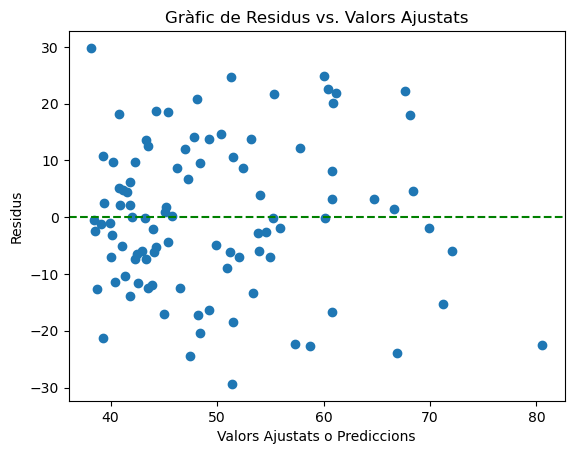

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Ajustem el model de regressió
model = sm.OLS(y, sm.add_constant(x)).fit()
predictions = model.predict(sm.add_constant(x))
residus = model.resid

# Creem el gràfic de residus
plt.scatter(predictions, residus)
plt.axhline(0, linestyle='--', color='green')
plt.xlabel('Valors Ajustats o Prediccions')
plt.ylabel('Residus')
plt.title('Gràfic de Residus vs. Valors Ajustats')
plt.show()


Com podem veure en el gràfic de Residus vs. Valors Ajustats, la variabilitat dels errors o residus es manté constant al llarg del rang de valors ajustats. Aquesta dispersió consistent dels residus al voltant de la línia zero, suggereix que la suposició de homoscedasticitat es compleix per al nostre model de regressió. En casos com aquest, podem tenir més confiança en les nostres inferències estadístiques, com el test d'hipòtesi, ja que es basen en la suposició de variància igual a través de tots els nivells de les variables independents.

Ara comprovarem si hi ha normalitat en els residus del nostre model de regressió. És important perquè els tests d'hipòtesi assumeixen que els residus són normalment distribuïts. Ho comprovarem mitjançant un histograma dels residus i un gràfic Q-Q dels residus i alhora aplicant un test de Shapiro-Wilk als residus.

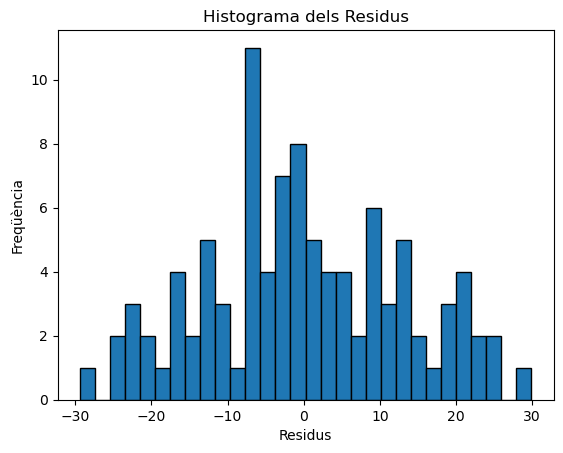

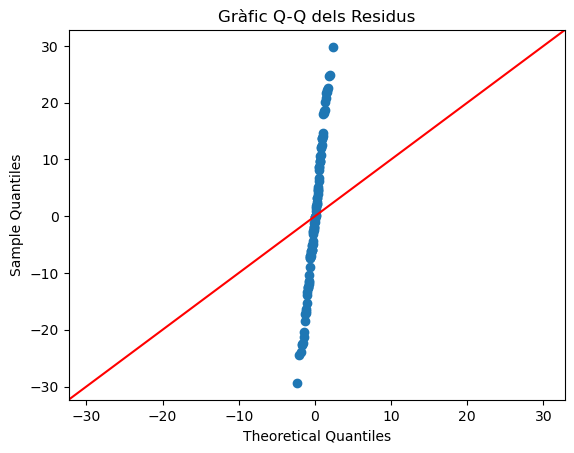

Estadístic de Shapiro-Wilk: 0.9879190921783447, p-valor: 0.5171495079994202


In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# Ajustem el model de regressió
model = sm.OLS(df_uefa['Pts'], sm.add_constant(df_uefa['Attendance'])).fit()

# Obtenim els residus
residus = model.resid

# Creem un histograma dels residus
plt.hist(residus, bins=30, edgecolor='black')
plt.title('Histograma dels Residus')
plt.xlabel('Residus')
plt.ylabel('Freqüència')
plt.show()

# Creem un gràfic Q-Q dels residus
sm.qqplot(residus, line ='45')
plt.title('Gràfic Q-Q dels Residus')
plt.show()

# Fem un Test de Shapiro-Wilk per la normalitat dels residus
stat, p = shapiro(residus)
print(f'Estadístic de Shapiro-Wilk: {stat}, p-valor: {p}')


L'Histograma de residus ens mostra certa normalitat en les dades (en forma de campana simètrica), malgrat que una de les columnes presenta valors atípics o outliers, amb una freqüència superior a 11 i alguns valors centrals són massa baixos (amb una freqüència d'1 aprox.). <br>

Pel que fa al Gràfic Q-Q dels residus, els valors es distribueixen en una línia vertical i no diagonal com representaria una normalitat. Això ens porta a pensar que potser hauríem de considerar si un model més complex o diferent (com una regressió no lineal) seria més adequat.

Per altra banda, l'estadístic de Shapiro-Wilk ens dóna com a valor 0.9879. Un valor proper a 1 indica que les dades estan més properament alineades amb una distribució normal, com en aquest cas. Això suggereix que la distribució dels residus no es desvien molt de la normalitat. Pel que fa al p-valor, ens diu si hi ha evidència estadística suficient per rebutjar la hipòtesi nul·la de la prova. La hipòtesi nul·la per aquest test és que les dades estan distribuïdes normalment. 

<b>Anàlisi dels resultats<b> 
    
Tenint en compte els resultats dels gràfics realitzats, els residus mostren signes de normalitat amb la presència d'outliers, com s'indica en l'Histograma de residus i en el Gràfic Q-Q, suggerint possibles desviacions de la normalitat. Tot i això, el gràfic de Residus vs. Valors Ajustats indica homoscedasticitat, i s'observa una relació lineal entre les variables, tot i la presència d'alguns punts allunyats de la línia de tendència. Aquesta combinació de factors suggereix que, mentre el model de regressió lineal pot ser adequat, és important procedir amb precaució, considerant la possible influència dels outliers i la desviació de la normalitat, i potser explorant models més complexos si les desviacions són substancials.
    
En conclusió, mentre que la comprovació d'homoscedasticitat i linealitat dóna suport a l'ús d'un model de regressió lineal, les preocupacions sobre la normalitat dels errors, especialment amb la presència d'outliers, suggereixen que pot ser necessari considerar un enfocament alternatiu o més complex.

Davant d'aquesta situació, decidim fer una transformació de dades, concretament una transformació logarítmica, la qual és una tècnica útil per millorar la normalitat dels residus i reduir l'impacte dels outliers en una anàlisi de regressió. 

Mirem primer si transformem ambdues o una sola variable de les estudiades, mitjançant boxplots.  

- Transformar 'Attendance': Si l'assistència mostra una gran variabilitat i afecta significativament la variable dependent (Pts) de manera no lineal, aquesta podria ser una bona candidata per a la transformació.

- Transformar 'Pts': Si els punts guanyats mostren una distribució asimètrica o tenen outliers significatius, considerarem transformar aquesta variable.

- Transformar ambdues: En alguns casos, pot ser beneficiós transformar ambdues variables per millorar l'ajust global del model i la normalitat dels residus.

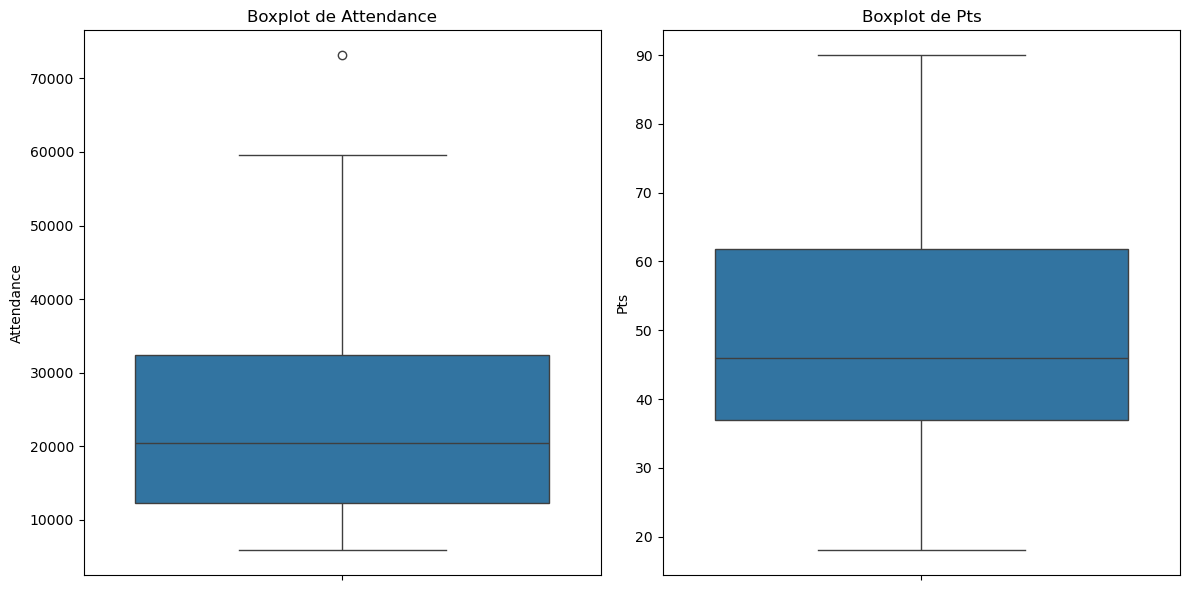

In [11]:
# Creem boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 fila, 2 columnes, primer gràfic
sns.boxplot(y=df_uefa['Attendance'])
plt.title('Boxplot de Attendance')

plt.subplot(1, 2, 2)  # 1 fila, 2 columnes, segon gràfic
sns.boxplot(y=df_uefa['Pts'])
plt.title('Boxplot de Pts')

plt.tight_layout()

plt.show()

Observant els dos boxplots, veiem que la variable 'Attendance' presenta outliers, a més que la mediana sembla estar més a prop del quartil inferior, cosa que podria indicar una distribució lleugerament esbiaixada. D'altra banda, la variable 'Pts' no presenta outliers evidents i la distribució es troba més centrada. Per aquest motiu, considerem transformar només 'Attendance' primer i després revisar l'impacte en el model de regressió.

In [12]:
# Primer comprovem que tots els valors d'Attendance' siguin majors que 0
# ja que el logaritme de 0 o d'un nombre negatiu no està definit.

if (df_uefa['Attendance'] <= 0).any():
    print("Hi ha valors no positius a 'Attendance' que no es poden transformar amb logaritme.")
else:
    # Apliquem la transformació logarítmica
    df_uefa['log_Attendance'] = np.log(df_uefa['Attendance'])

In [13]:
 # Ara comprovem que el dataframe conté una nova columna 'log_Attendance' amb la transformació aplicada:
df_uefa.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,log_Attendance
0,1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson,10.873110
1,2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson,10.884948
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois,10.612114
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer,10.409582
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas,10.625902


Ara comprovarem la normalitat de la variable 'Attendance' mitjançant un histograma:

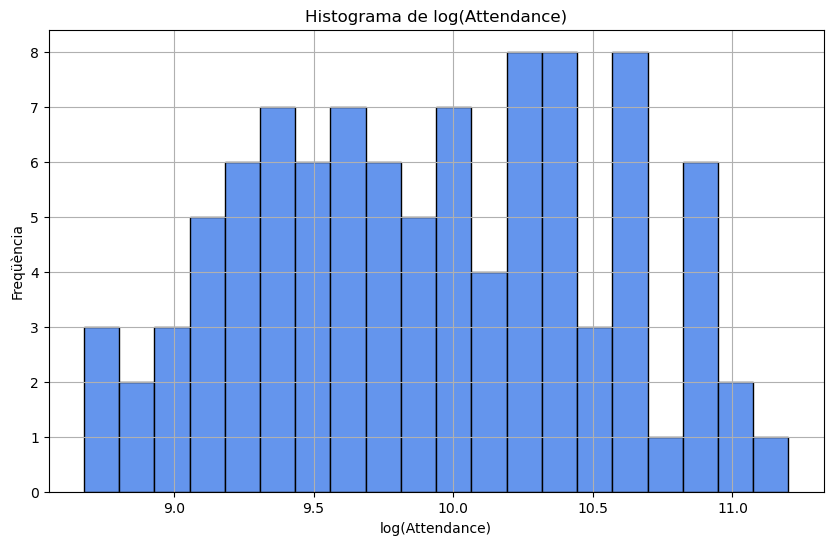

In [14]:
# Ens assegurem que no hi ha valors no positius en la columna 'Attendance'
if (df_uefa['Attendance'] <= 0).any():
    print("La columna 'Attendance' conté valors no positius que no es poden transformar.")
else:
    # Realitzem la transformació logarítmica
    df_uefa['log_Attendance'] = np.log(df_uefa['Attendance'])

    # Creem un histograma de la variable transformada
    plt.figure(figsize=(10, 6))  # Configura la mida del gràfic
    plt.hist(df_uefa['log_Attendance'], bins=20, color='cornflowerblue', edgecolor='black')
    plt.title('Histograma de log(Attendance)')
    plt.xlabel('log(Attendance)')
    plt.ylabel('Freqüència')
    plt.grid(True)
    
    plt.savefig('Histograma_log_attendance')
    
    plt.show()

L'histograma de la variable 'log(Attendance)' mostra una distribució que encara que no és perfectament normal. Malgrat això, no hi ha evidència clara d'esbiaixament significatiu a la dreta ni a l'esquerra, ni d'outliers extrems.

El pas següent en el nostre anàlisi serà realitzar un test estadístic per a la normalitat, com el test de Shapiro-Wilk, per confirmar si la distribució difereix significativament d'una distribució normal.

In [15]:
# Importem la llibreria
from scipy.stats import shapiro

# Realitzem el test de Shapiro-Wilk
statistic, p_value = shapiro(df_uefa['log_Attendance'])

print('Estadístic de Shapiro-Wilk:', statistic)
print('P-valor:', p_value)

# Interpretació del P-valor
if p_value > 0.05:
    print("La distribució de 'log(Attendance)' sembla normal (no es rebutja la hipòtesi nul·la).")
else:
    print("La distribució de 'log(Attendance)' no sembla normal (es rebutja la hipòtesi nul·la).")

Estadístic de Shapiro-Wilk: 0.9778198599815369
P-valor: 0.09623060375452042
La distribució de 'log(Attendance)' sembla normal (no es rebutja la hipòtesi nul·la).


El resultat del test de Shapiro-Wilk, amb un valor estadístic de 0.9778 i un p-valor de 0.0962, indica que no hi ha evidència estadísticament significativa per rebutjar la hipòtesi nul·la que la variable 'log(Attendance)' segueix una distribució normal. Això significa que per al nivell de significació estàndard de 0.05, la distribució de 'log(Attendance)' no difereix significativament d'una distribució normal. 

Ara que hem comprovat la normalitat, podem procedir amb l'anàlisi de regressió utilitzant 'log(Attendance)' com una de les variables predictores. Mirarem el p-valor associat amb el coeficient de l'assistència.
Si el p-valor és menor que el nivell de significació (normalment 0.05), rebutjarem la hipòtesi nul·la en favor de l'alternativa.
Si el p-valor és més gran, no podrem rebutjar la hipòtesi nul·la.

In [16]:
# Importem la llibreria necessària per fer els càlculs
import statsmodels.api as sm

# Definim les variables independents i dependents utilitzant la variable transformada
X = df_uefa['log_Attendance']  # Ara utilitzem 'log_Attendance' com a variable independent
y = df_uefa['Pts']             # Variable dependent (punts)

# Afegim una constant al model per tenir un terme d'intercepció
X = sm.add_constant(X)

# Creem el model de regressió lineal
model = sm.OLS(y, X).fit()

# Obtenim els resultats de la regressió
resultats = model.summary()

# Mostrem els resultats
print(resultats)

                            OLS Regression Results                            
Dep. Variable:                    Pts   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     43.82
Date:                Mon, 15 Jan 2024   Prob (F-statistic):           2.06e-09
Time:                        12:17:29   Log-Likelihood:                -392.86
No. Observations:                  98   AIC:                             789.7
Df Residuals:                      96   BIC:                             794.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -94.6096     21.849     -4.

El model de regressió mostra que 'log(Attendance)' té una relació estadísticament significativa amb els punts ('Pts') guanyats, on aproximadament el 31.3% de la variabilitat de 'Pts' es pot explicar per canvis en 'log(Attendance)'. Cada increment unitari en 'log(Attendance)' està associat amb un augment de 14.56 punts en 'Pts'. El model és globalment significatiu amb una probabilitat de F inferior a 0.001. Els tests de diagnòstic suggereixen que no hi ha violació de la normalitat dels residus, però el coeficient Durbin-Watson indica la possible presència d'auto-correlació que caldria investigar més detalladament. Els resultats han de ser interpretats amb cautela, tenint en compte l'escala logarítmica de la variable predictora.

En el nostre model, el p-valor associat amb el coeficient per a 'log(Attendance)' és extremadament baix (2.06e-09, és a dir  inferior a 0.0001), significativament menor que el llindar comú de 0.05. Això significa que hi ha una evidència estadística significativa per rebutjar la hipòtesi nul·la (Ho) que suggereix que no hi ha cap relació entre 'log(Attendance)' i 'Pts'. En altres paraules, els resultats indiquen que hi ha una relació estadísticament significativa entre el nivell d'assistència de públic (en logaritme) i el rendiment de l'equip.

Per tant, acceptaríem la hipòtesi alternativa (Ha) que proposa que el nivell d'assistència de públic sí influeix en el rendiment de l'equip. Tanmateix, cal recordar que una correlació no implica causalitat. Encara que hi hagi una relació estadísticament significativa entre 'log(Attendance)' i 'Pts', això no necessàriament significa que una major assistència de públic causi un millor rendiment de l'equip. Pot haver-hi factors ocults o variables no incloses en el model que podrien influir en ambdues variables, o podria ser que un millor rendiment de l'equip porti a una major assistència. Per tant, mentre que el model proporciona evidència d'una associació, qualsevol conclusió sobre la causalitat hauria de ser investigada amb més detall.

# Exercici 2

Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

Hem decidit comparar les mitjanes de punts entre equips de dos països diferents. Per fer-ho, farem un t-test.

Primer establim la hipòtesi nul.la i alternativa:

H0 = No hi ha diferències estadístiques entre la mitjana de punts dels equips d'Espanya i Anglaterra <br>
H1 = Hi ha diferències estadístiques entre la mitjana de punts dels equips d'Espanya i Anglaterra

Un cop establertes les hipòtesis, comprovarem els supòsits per al T-Test:

- Normalitat: comprovarem si les puntuacions dels equips en cada país segueixen una distribució aproximadament normal.
- Variància Homogènia: comprovarem si les variàncies dels dos grups són similars.

Per a comprovar la normalitat en la puntuació dels equips crearem un histograma amb la puntuació d'Espanya i un altre amb la puntuació d'Anglaterra.

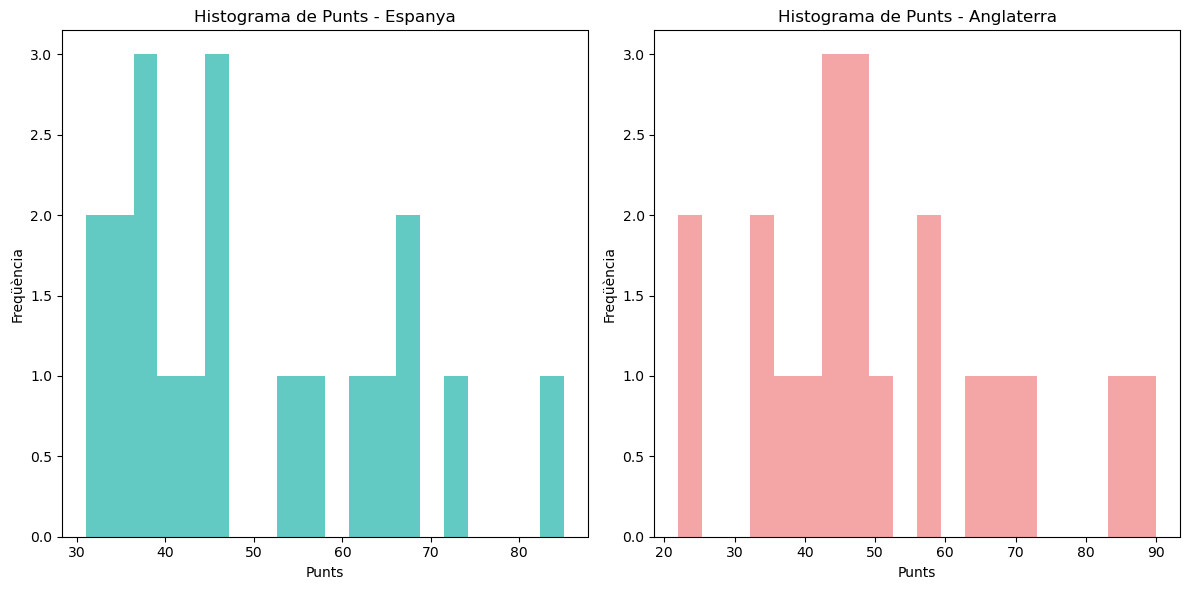

In [17]:
import matplotlib.pyplot as plt

# Filtem dades per a cada país
df_espanya = df_uefa[df_uefa['Country'] == 'ESP']['Pts']
df_anglaterra = df_uefa[df_uefa['Country'] == 'ENG']['Pts']

# Creem els histogrames
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 fila, 2 columnes, primer gràfic
plt.hist(df_espanya, bins=20, color='lightseagreen', alpha=0.7)
plt.title('Histograma de Punts - Espanya')
plt.xlabel('Punts')
plt.ylabel('Freqüència')

plt.subplot(1, 2, 2)  # 1 fila, 2 columnes, segon gràfic
plt.hist(df_anglaterra, bins=20, color='lightcoral', alpha=0.7)
plt.title('Histograma de Punts - Anglaterra')
plt.xlabel('Punts')
plt.ylabel('Freqüència')

plt.tight_layout()
plt.show()

Basant-nos en l'anàlisi visual dels histograms, hem observat que les distribucions de punts per als equips d'Anglaterra i Espanya no segueixen la forma típica de campana associada amb les distribucions normals. Això planteja dubtes sobre la normalitat de les dades. Per afrontar aquesta qüestió, és important considerar la mida de les nostres mostres. Si cada grup (Anglaterra i Espanya) té més de 30 observacions, el Teorema del Límit Central podria aplicar-se, el que permetria que el t-test independent segueixi sent una eina robusta malgrat la possible no normalitat de les dades. Aquest teorema suggereix que, per a mostres grans, la distribució de la mitjana de la mostra tendirà a ser normal independentment de la forma de la distribució de la població. Així doncs, el proper pas serà comprovar la mida de les nostres mostres per determinar si podem procedir amb seguretat amb el t-test o si seria més apropiat considerar una alternativa no paramètrica.

In [18]:
# Seleccionem el nombre d'observacions per als països Anglaterra i Espanya
num_observacions_eng = df_uefa[df_uefa['Country'] == 'ENG'].shape[0]
num_observacions_esp = df_uefa[df_uefa['Country'] == 'ESP'].shape[0]

print("Nombre d'observacions per Anglaterra (ENG):", num_observacions_eng)
print("Nombre d'observacions per Espanya (ESP):", num_observacions_esp)

Nombre d'observacions per Anglaterra (ENG): 20
Nombre d'observacions per Espanya (ESP): 20


Amb 20 observacions per a cada grup (Anglaterra i Espanya), ens trobem en una situació on la mida de les mostres no és suficientment gran per a aplicar el Teorema del Límit Central de manera efectiva. Així doncs, decidim aplicar el Test U de Mann-Whitney: Aquest és un test no paramètric que no fa supòsits sobre la normalitat de les dades. És útil per comparar dues mostres independents quan no es pot assumir la normalitat.

In [19]:
# Importem la llibreria
from scipy.stats import mannwhitneyu

# Seleccionem les dades per a Anglaterra i Espanya
data_eng = df_uefa[df_uefa['Country'] == 'ENG']['Pts']
data_esp = df_uefa[df_uefa['Country'] == 'ESP']['Pts']

# Apliquem el Test U de Mann-Whitney
u_statistic, p_value = mannwhitneyu(data_eng, data_esp)

# Mostrem els resultats
print("Estadístic U:", u_statistic)
print("P-valor:", p_value)

# Interpretem el p-valor
if p_value < 0.05:
    print("Hi ha diferències significatives entre les mostres.")
else:
    print("No hi ha diferències significatives entre les mostres.")

Estadístic U: 207.0
P-valor: 0.8603661365095909
No hi ha diferències significatives entre les mostres.


Els resultats del Test U de Mann-Whitney amb un estadístic U de 207.0 i un p-valor de 0.8603661365095909 indiquen que no hi ha diferències estadísticament significatives entre les mostres d'Anglaterra i Espanya per a la variable analitzada (en aquest cas 'Pts'). Un p-valor tan alt, molt per sobre del llindar comú de 0.05, significa que no podem rebutjar la hipòtesi nul·la de que les distribucions de les dues mostres són iguals. Això implica que, segons les dades i el test aplicat, no hi ha evidència suficient per afirmar que hi ha una diferència en el rendiment entre els equips d'Anglaterra i Espanya en el conjunt de dades. 

# Exercici 3

Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.



Els tres atributs que seleccionarem seran:

- Country (país), com a variable independent categòrica. Aquesta variable pot servir per agrupar equips en diferents nivells segons el país al qual pertanyen. Per investigar si hi ha diferències en el rendiment (mesurat per qualsevol variable dependent contínua) entre aquests països.

- xG (Gols Esperats), com a primera variable dependent contínua. És una mesura del nombre de gols que un equip hauria d'haver marcat basant-se en la qualitat de les oportunitats creades.

- xGA (Gols Esperats en Contra), com a segona variable dependent contínua. És una mesura del nombre de gols que un equip hauria d'haver rebut basant-se en la qualitat de les oportunitats concedides.

Amb aquestes variables, podem fer un ANOVA (Anàlisi de la variància) per determinar si hi ha diferències significatives en els gols esperats (xG) o els gols esperats en contra (xGA) entre els equips de diferents països.

Primer de tot establim les hipòtesis:
    
H0: No hi ha diferències significatives entre la mitjana de xG o xGA, és la mateixa per a tots els països.

H1: Almenys en un país, la mitjana de xG o xGA difereix d'una o més de les altres mitjanes de països.

Abans de poder aplicar una ANOVA però, haurem de comprovar que es compleixin els següents requisits:

- Independència de les observacions
- Normalitat de les dades
- Homoscedasticitat o igualtat de variàncies

Pel que fa al primer requisit, assumirem que les observacions són independents, una suposició basada en el disseny estàndard de recollida de dades en l'àmbit esportiu, on cada partit o actuació d'un equip es considera un esdeveniment independent. Això es deu a la naturalesa inherent de les competicions esportives, com el futbol, on cada encontre es realitza en condicions úniques i variables. Tot i ser conscients que la verificació completa de la independència no és factible degut a limitacions en les dades disponibles i la falta d'informació detallada sobre possibles dependències, aquesta suposició és una pràctica habitual i raonable per a anàlisis estadístiques en aquest context.

Per al segon requisit, aplicarem un Test de Shapiro-Wilk per comprovar la normalitat de les variables seleccionades.

In [20]:
# Importem la llibreria
from scipy.stats import shapiro

# Apliquem el test de Shapiro-Wilk a cada grup per a xG i xGA

for country in df_uefa['Country'].unique():
    data_xG = df_uefa[df_uefa['Country'] == country]['xG'].dropna()
    data_xGA = df_uefa[df_uefa['Country'] == country]['xGA'].dropna()
    
    stat_xG, p_xG = shapiro(data_xG)
    stat_xGA, p_xGA = shapiro(data_xGA)
    
    print(f"País: {country}")
    print(f"xG - Estadístic: {stat_xG}, P-valor: {p_xG}")
    print(f"xGA - Estadístic: {stat_xGA}, P-valor: {p_xGA}")
    print()

País: ENG
xG - Estadístic: 0.8463538289070129, P-valor: 0.00463360920548439
xGA - Estadístic: 0.9874112606048584, P-valor: 0.9926565885543823

País: ESP
xG - Estadístic: 0.9373729825019836, P-valor: 0.2137812376022339
xGA - Estadístic: 0.9665228724479675, P-valor: 0.6804279685020447

País: GER
xG - Estadístic: 0.9415671825408936, P-valor: 0.308173269033432
xGA - Estadístic: 0.9681265354156494, P-valor: 0.761812686920166

País: FRA
xG - Estadístic: 0.9350855946540833, P-valor: 0.1933368593454361
xGA - Estadístic: 0.9249547123908997, P-valor: 0.12344576418399811

País: ITA
xG - Estadístic: 0.9326868653297424, P-valor: 0.17391835153102875
xGA - Estadístic: 0.9480521082878113, P-valor: 0.3384877145290375



Els resultats del test de Shapiro-Wilk aplicat a les variables xG i xGA per a diversos països revelen que, amb l'excepció de xG per a Anglaterra, totes les altres combinacions de variables i països semblen seguir una distribució normal. Concretament, per a Anglaterra, la variable xG mostra un p-valor de 0.0046, indicant una desviació significativa de la normalitat. En canvi, la variable xGA per a Anglaterra, així com les variables xG i xGA per a Espanya, Alemanya, França, i Itàlia, mostren p-valors molt més alts que el llindar estàndard de 0.05, suggerint que les seves distribucions no difereixen significativament d'una distribució normal. Aquesta constatació de normalitat per a la majoria de les grups és important per a l'aplicació de mètodes estadístics paramètrics com l'ANOVA, tot i que la falta de normalitat en xG per a Anglaterra requereix una atenció especial, podent necessitar un enfocament alternatiu o una transformació de les dades per a aquest grup específic.

Decidim fer una transformació logarítmica de les dades de xG per a Anglaterra:

In [21]:
# Comprovem si tots els valors de xG són positius
if (df_uefa['xG'] > 0).all():
    print("Tots els valors de xG són positius.")
    # Aplicar la transformació logarítmica directament
    df_uefa['log_xG'] = np.log(df_uefa['xG'])
else:
    print("Hi ha valors no positius en xG.")
    # Decidir com tractar els valors no positius abans d'aplicar la transformació
    df_uefa['log_xG'] = np.log(df_uefa['xG'] + 1)  # Afegir 1 per assegurar-se que tots els valors siguin positius

Tots els valors de xG són positius.


Per últim, per poder aplicar l'ANOVA necessitem comprovar l'homoscedasticitat o igualtat de variàncies. Per fer-ho, podem  utilitzar el test de Levene o el test de Bartlett. Aquests tests examinen si les variàncies d'un conjunt de mostres són iguals. El test de Levene és generalment més robust davant desviacions de la normalitat, mentre que el test de Bartlett és més sensible a aquestes desviacions. Així doncs, aplicarem el test de Levene.

In [22]:
# Importem la llibreria
from scipy.stats import levene

# Agrupem les dades per país
groups_xG = [df_uefa[df_uefa['Country'] == country]['xG'] for country in df_uefa['Country'].unique()]
groups_xGA = [df_uefa[df_uefa['Country'] == country]['xGA'] for country in df_uefa['Country'].unique()]

# Apliquem el Test de Levene
stat_xG, p_xG = levene(*groups_xG)
stat_xGA, p_xGA = levene(*groups_xGA)

# Mostrem els resultats
print("Test de Levene per xG:")
print("Estadístic:", stat_xG, "P-valor:", p_xG)

print("\nTest de Levene per xGA:")
print("Estadístic:", stat_xGA, "P-valor:", p_xGA)

Test de Levene per xG:
Estadístic: 0.12815652963787885 P-valor: 0.9718566298660793

Test de Levene per xGA:
Estadístic: 2.1876960770422396 P-valor: 0.07635592770080166


Els resultats del test de Levene per a les variables xG i xGA en el context de dades de futbol indiquen que la suposició d'homoscedasticitat, o igualtat de variàncies, es manté en general. Per a la variable xG (Gols Esperats), amb un p-valor de 0.972, no hi ha evidència estadística que indiqui una diferència significativa en les variàncies entre els grups de diferents països. Això significa que la variabilitat de xG és consistent a través dels països estudiats. Per a la variable xGA (Gols Esperats en Contra), tot i que el p-valor és relativament baix (0.076), encara està per sobre del llindar comú de 0.05, suggerint que tampoc hi ha diferències significatives en les variàncies de xGA entre els països. Aquesta uniformitat en les variàncies de les dades justifica l'ús de l'ANOVA per a anàlisis posteriors, ja que una de les premisses clau d'aquest test es compleix en ambdues variables. Així doncs, passem a aplicar l'ANOVA.

In [23]:
# Importem la llibreria
from scipy import stats

# Per a xG, utilitzarem la columna transformada per a Anglaterra i la columna original per a la resta de països
groups_xG = [df_uefa[df_uefa['Country'] == country]['log_xG'] if country == 'ENG' else df_uefa[df_uefa['Country'] == country]['xG'] for country in df_uefa['Country'].unique()]

# Per a xGA, continuem utilitzant la columna original
groups_xGA = [df_uefa[df_uefa['Country'] == country]['xGA'] for country in df_uefa['Country'].unique()]

# Realitzem l'ANOVA per a xG
anova_result_xG = stats.f_oneway(*groups_xG)

# Realitzem l'ANOVA per a xGA
anova_result_xGA = stats.f_oneway(*groups_xGA)

# Mostrem els resultats
print(f"El resultat de l'ANOVA per xG és: F={anova_result_xG.statistic:.2f}, p={anova_result_xG.pvalue:.5f}")
print(f"El resultat de l'ANOVA per xGA és: F={anova_result_xGA.statistic:.2f}, p={anova_result_xGA.pvalue:.5f}")

El resultat de l'ANOVA per xG és: F=69.69, p=0.00000
El resultat de l'ANOVA per xGA és: F=0.69, p=0.60074


Els resultats de l'ANOVA realitzada sobre les dades de futbol per a les variables xG (Gols Esperats) i xGA (Gols Esperats en Contra) mostren conclusions interessants. Per a xG, l'estadístic F elevat (69.69) i un p-valor extremadament baix (0.00000) indiquen que existeixen diferències significatives en els gols esperats marcats entre els equips de diferents països. Aquest resultat suggerix que factors relacionats amb el país, com podrien ser l'estil de joc, la qualitat de les lligues, o altres variables culturals o estructurals, podrien influir de manera significativa en la capacitat ofensiva dels equips, tal com es mesura a través de xG.

En contrast, per a xGA, amb un estadístic F de 0.69 i un p-valor de 0.60074, no trobem evidència que indiqui diferències significatives en els gols esperats en contra entre els països. Això implica que, pel que fa a la defensa o la capacitat de prevenir gols en contra, els equips dels diferents països estudiats podrien tenir un rendiment més homogeni, o que els factors que afecten aquest aspecte del joc són més uniformes entre els països. En resum, mentre que l'aspecte ofensiu del joc (xG) varia significativament entre els països, l'aspecte defensiu (xGA) mostra una major uniformitat a través de les diverses seleccions nacionals incloses en l'estudi.

<b> Anàlisi post-hoc</b>

Finalment, realitzarem un anàlisi post-hoc després de l'ANOVA, per tal d'aprofundir en els resultats i entendre millor les dinàmiques subtils dins de les nostres dades. Quan l'ANOVA indica que hi ha diferències estadísticament significatives entre els grups, això només ens informa que no tots els grups són iguals, però no especifica quins grups difereixen entre si ni la naturalesa d'aquestes diferències. L'anàlisi post-hoc, com el test de Tukey, permet comparar parelles de grups de manera detallada, identificant específicament on es troben aquestes diferències significatives. Això és especialment útil en estudis amb múltiples grups, com en el nostre anàlisi de xG entre diferents països, on les interaccions i les comparacions no són immediatament evidents. Amb aquest anàlisi més profund, podem obtenir una comprensió més completa i matitzada de les dades, permetent-nos fer inferències més precises i informades.

In [24]:
# Importem les llibreries
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Creem una nova columna 'xG_combined' que conté els valors correctes per a cada país
df_uefa['xG_combined'] = df_uefa.apply(lambda row: row['log_xG'] if row['Country'] == 'ENG' else row['xG'], axis=1)

# Realitzem l'anàlisi post-hoc de Tukey
tukey = pairwise_tukeyhsd(endog=df_uefa['xG_combined'], groups=df_uefa['Country'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   ENG    ESP  41.6571    0.0  32.2574 51.0568   True
   ENG    FRA  44.7821    0.0  35.3824 54.1818   True
   ENG    GER  46.2988    0.0  36.6415  55.956   True
   ENG    ITA  45.5971    0.0  36.1974 54.9968   True
   ESP    FRA    3.125 0.8866  -6.2747 12.5247  False
   ESP    GER   4.6417 0.6689  -5.0156 14.2989  False
   ESP    ITA     3.94 0.7705  -5.4597 13.3397  False
   FRA    GER   1.5167 0.9923  -8.1406 11.1739  False
   FRA    ITA    0.815 0.9992  -8.5847 10.2147  False
   GER    ITA  -0.7017 0.9996 -10.3589  8.9556  False
-----------------------------------------------------


Els resultats del test de Tukey HSD ofereixen una visió profunda sobre les diferències en els gols esperats (xG) entre els equips de futbol de diferents països. Aquesta anàlisi compara les mitjanes de xG entre parells de països i utilitza un p-valor ajustat per determinar si les diferències observades són estadísticament significatives.

En primer lloc, les comparacions que inclouen Anglaterra (ENG) mostren diferències significatives en xG en comparació amb Espanya (ESP), França (FRA), Alemanya (GER) i Itàlia (ITA). Aquests resultats són estadísticament significatius, amb un p-valor ajustat de 0.0, indicant que els gols esperats d'Anglaterra són substancialment diferents dels d'aquests altres països. Aquesta diferència significativa podria reflectir un estil de joc únic, una qualitat diferent en les lligues, o altres factors culturals o estructurals que influencien la capacitat ofensiva dels equips anglesos.

En contrast, quan es comparen entre ells els països Espanya, França, Alemanya i Itàlia, no es troben diferències significatives en els seus xG. En aquestes comparacions, els p-valors ajustats són alts i la hipòtesi nul·la no es rebutja, suggerint que no hi ha diferències estadísticament significatives en els gols esperats entre aquests països. Això implica que en termes de xG, els equips d'aquests països podrien tenir un rendiment més homogeni o que els factors que afecten aquest aspecte del joc són similars entre aquests països. En resum, mentre que Anglaterra es distingeix clarament en termes de xG, els altres grans països futbolístics mostren una major uniformitat en aquesta mètrica.